# Cleansing Data in Python !

Cleaning data is a mandatory process for every data scientist to perform. Dealing with data not properly cleaned can lead to inaccurate data analysis or machine learning model. Which results to drawing inacuurate conclusions.
In this tutorial, we will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python.We will deal with improper data types, check that out data is in the correct range, handle missing data, and more!

![cleaning data in python](data_cleaning.jfif "Data Cleansing")

## Data type constraints

When working with data, there are various types that we may encounter along the way. We could be working with text data, integers, decimals, dates, zip codes, and others.<br /> So, we need to make sure our variables have the correct data types, otherwise we risk compromising our analysis. Luckily, Python has specific data type objects for various data types!
Let's take, for instance, chess games dataset imported from [Kaggle](https://www.kaggle.com/datasnaek/chess).

In [326]:
import pandas as pd

df = pd.read_csv('games.csv')#, index_col=0)

df.info()
    
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20065 entries, 0 to 20064
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20065 non-null  object 
 1   rated           20065 non-null  bool   
 2   created_at      20065 non-null  float64
 3   last_move_at    20065 non-null  float64
 4   turns           20065 non-null  int64  
 5   victory_status  20065 non-null  object 
 6   winner          20065 non-null  object 
 7   increment_code  20065 non-null  object 
 8   white_id        20065 non-null  object 
 9   white_rating    20065 non-null  int64  
 10  black_id        20065 non-null  object 
 11  black_rating    20065 non-null  int64  
 12  moves           20065 non-null  object 
 13  opening_eco     20065 non-null  object 
 14  opening_name    20065 non-null  object 
 15  opening_ply     20065 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


As we can see, our dataset contains nine column of data type 'Object'. They are supposed to be strings. We have to convert all object types to strings. <br />For that, we need to call the pandas function pandas.Series.astype(dtype). Here, the dtype needed is str.
Since there are nine columns to be converted, we need a loop.

In [327]:
for column in df:
    if str(df[column].dtype) == 'object':
        df[column] = df[column].astype(str)

Furthermore, we can notice that the two columns "created_at" and "last_move_at" are floats.<br />Obvioulsy, they are supposed to have Date as data type.
To do that, we should apply pandas.to_datetime method.

In [328]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['last_move_at'] = pd.to_datetime(df['last_move_at'])

When we apply the head method, we can see the results.

In [329]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1970-01-01 00:25:04.210,1970-01-01 00:25:04.210,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1970-01-01 00:25:04.130,1970-01-01 00:25:04.130,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


## Range constraints

Obviously, the rating of a player in a match can not be negative.
After creating a histogram with matplotlib, we see that there are a few games with white players having ratings below zero.
<br />This is mostly because of typo error. We should treat these cases and change them to positive numbers.

Text(0.5, 1.0, 'Negative white rating of games')

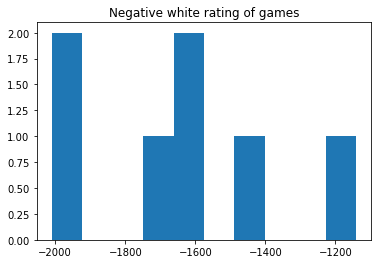

In [330]:
import matplotlib.pyplot as plt
plt.hist(df[df['white_rating']<0]['white_rating'])
plt.title('Negative white rating of games')

In [331]:
df['white_rating'] = abs(df['white_rating'])
df['white_rating'].min() # >0

784

We also see the same problem with black rating.

In [332]:
print(df[df['black_rating']<0]['id'])

20       oQklnWWp
40       R9a2DLwe
59       QZSTu1aT
78       Mi1AmkiI
14196    NmQjNNrg
17791    tUOZivwN
Name: id, dtype: object


In [333]:
df['black_rating'] = abs(df['black_rating'])
assert df['black_rating'].min() > 0  # No output

## Uniqueness constraints

Duplicate values usually happen because of data entry and human error or join or merge errors.
<br />Let's see whether our data frame contains duplicate values using the method pandas.DataFrame.duplicated

In [334]:
duplicates = df.duplicated(keep = 'first') # keeping only the first row
df[duplicates].head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
950,XRuQPSzH,True,1970-01-01 00:25:03.580,1970-01-01 00:25:03.580,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
1794,x1Svcl0P,True,1970-01-01 00:24:59.820,1970-01-01 00:24:59.830,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1830,wgIHzqDo,True,1970-01-01 00:24:59.710,1970-01-01 00:24:59.710,113,mate,white,10+0,quantummequanic,1403,barrow-wight,1364,e4 e6 e5 Bc5 d4 Be7 c3 Nh6 Bxh6 gxh6 Qd2 Bg5 f...,C00,French Defense: Steinitz Attack,3


The complete duplicates can be treated easily. All that is required is to keep one of them only and discard the others.
<br />This can be done with the dot-drop_duplicates() method.

In [335]:
df.drop_duplicates(keep='first', inplace=True)

In [336]:
duplicates = df.duplicated(keep = False) # keeping only the first row
assert(len(df[duplicates])==0) # No output

## Categories and membership constraints

For this type of problem, we will be dealing with an obvious categorical data which is the survival status.
We will work on the titanic dataset.
<br />Before cleaning our data, we need to import the csv file and see what's inside.

In [337]:
df = pd.read_csv('Titanic.csv')

survived = {0, 1}
df[~df['Survived'].isin(survived)]

,Name,PClass,Age,Sex,Survived
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,5
98,"Foreman, Mr Benjamin Laventall",1st,30.0,male,4
140,"Hippach, Miss Jean Gertrude",1st,16.0,female,9
179,"Millet, Mr Francis Davis",1st,65.0,male,159
213,"Ross, Mr John Hugo",1st,NaN,male,32
925,"Khalil, Mr Betros",3rd,NaN,male,54


We need to get rid of these rows.

In [338]:
df = df[df['Survived'].isin(survived)]

## Handle missing data

When working on datasets, we usually face the problem of completeness and missing data. Like all of the previous constraints, it can be caused by technical error or human error.
<br />To see whether our dataframe contain missing values we apply DataFrame.isna().any() method.

In [339]:
df.isna().any()

Name        False
PClass       True
Age          True
Sex         False
Survived    False
dtype: bool

We clearly see missing data in PClass and Age columns. <br />
We also can plot missing values by columns to understand more the situation.

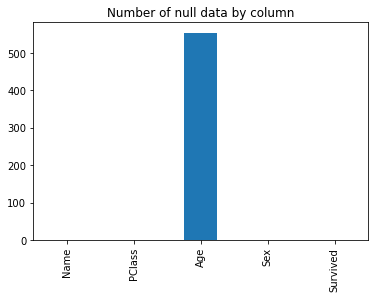

In [340]:
df.isna().sum().plot(kind="bar")
plt.title('Number of null data by column')
plt.show()

In [341]:
df[df['PClass'].isna()]

,Name,PClass,Age,Sex,Survived
456,Jacobsohn Mr Samuel,NaN,NaN,male,0


To handle this case, we coulds either delete rows that contains missing informations or raplace NaN values by the mean of that column if it is numerical.

In [342]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [343]:
len(df[df['Age'].isnull()])

0

In [344]:
df.dropna()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0
